# Analysis of Calcium Imaging Data In Sleep/ Light Iso

      Data Gathered: 01.29.15           
      Analyzed: 12.19.15
      Gathered By: WALIII & DPL
      
Analysis of Calciuim imaging data from sleep/light anesthesia, from the first 10 minutes of a 30 minute time series. Data was sampled at 10Hz.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline

In [5]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/ARGO/Dropbox/Jupyter/Sleep03.tif')

In [6]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [7]:
data.dtype

'uint8'

In [8]:
data.cache()
data.count();

In [9]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

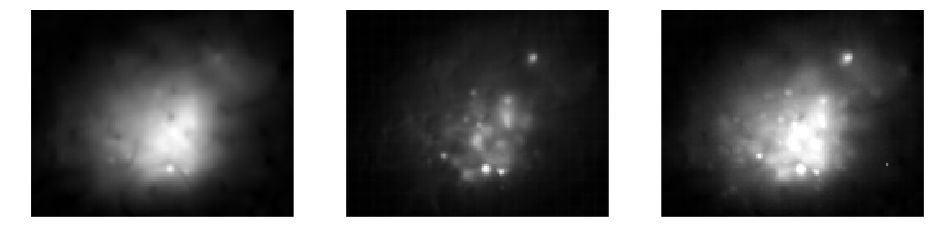

In [10]:
# look at the mean image
# NOTE: new Thunder distribution, by default the image function makes a new figure
# use: image(im[:], ax=plt.gca())

im = data.mean()


ax1 = plt.subplot(131)
im = data.mean()
image(im[:])
plt.subplot(132)
img = data.stdev()
image(img[:])
plt.subplot(133)
img = data.max()
image(img[:])

In [11]:
ts = data.toTimeSeries()

In [15]:
# Run PCA with three components

from thunder import PCA
model = PCA(k=10).fit(ts)

Here, we can plot the PCA components of the non-normalized signals:

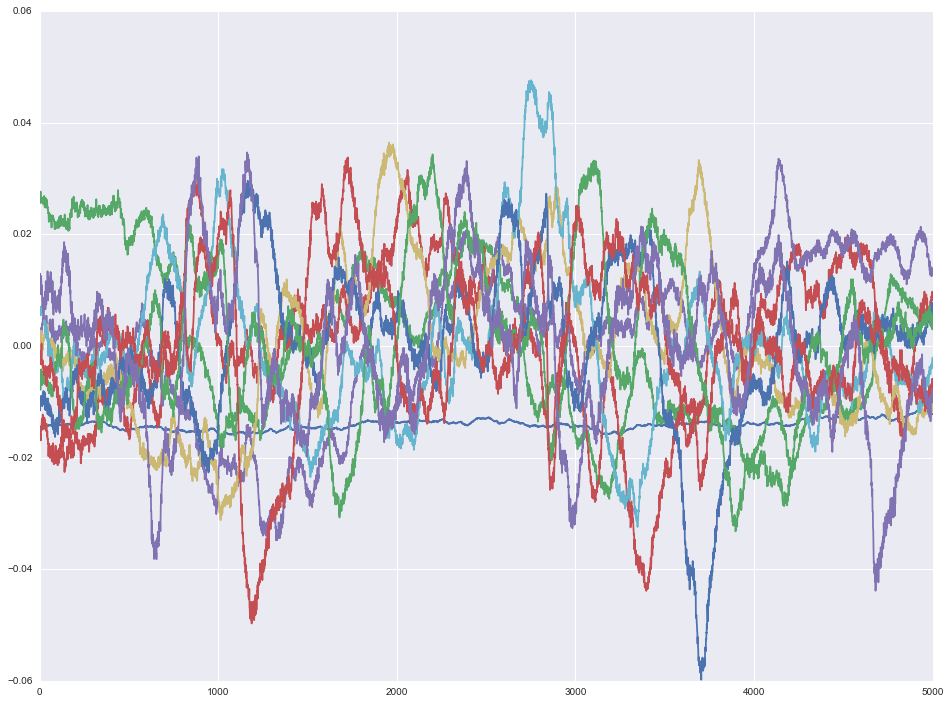

In [16]:
plt.plot(model.comps.T);


In [17]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one.

imgs = model.scores.pack()
imgs.shape

(10, 126, 160)

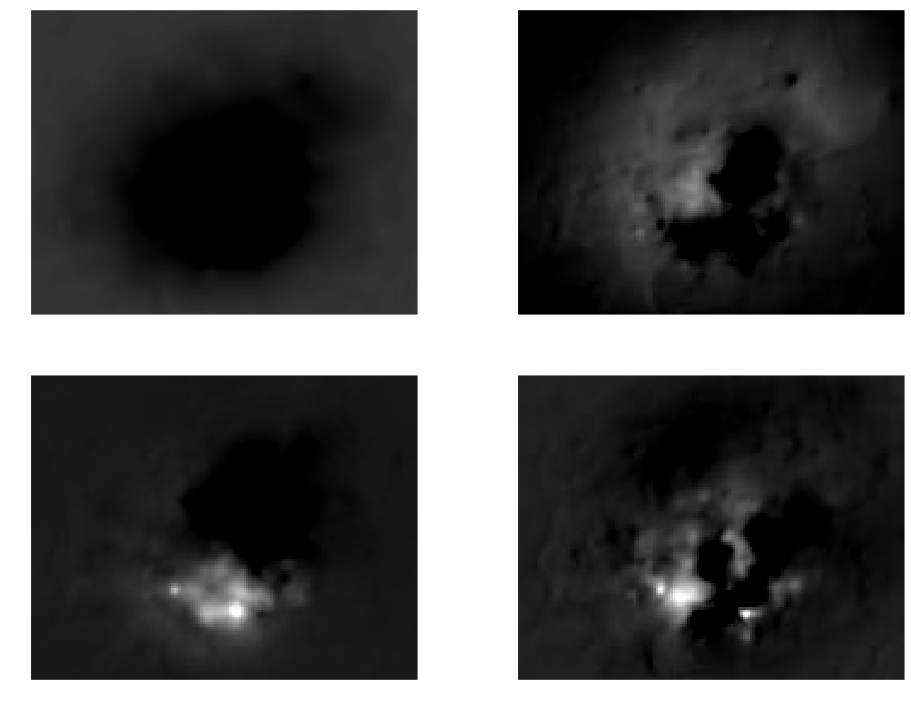

In [18]:
CX = (-0.005,0.05)

ax1 = plt.subplot(221)
image(imgs[0,:,:], clim=CX)
ax1 = plt.subplot(222)
image(imgs[1,:,:], clim=CX)
ax1 = plt.subplot(223)
image(imgs[2,:,:], clim=CX)
ax1 = plt.subplot(224)
image(imgs[3,:,:], clim=CX)

In [18]:
# take the last 3 PCs, since the first one dosn't look to informative...
gg = model.comps[1:,:]
gg.shape

(3, 5001)

In [20]:
# Lets seperate into the first an last three basis functions:
imgsA = imgs[0:3,:,:] # 123
imgsB = imgs[1:4,:,:]  # 234
imgsC = imgs[2:5,:,:] # 345
imgsD = imgs[3:6,:,:]  # 456
imgsE = imgs[4:7,:,:] # 567
imgsF = imgs[5:8,:,:]  # 678

imgsB.shape

(3, 126, 160)

In [28]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 12  

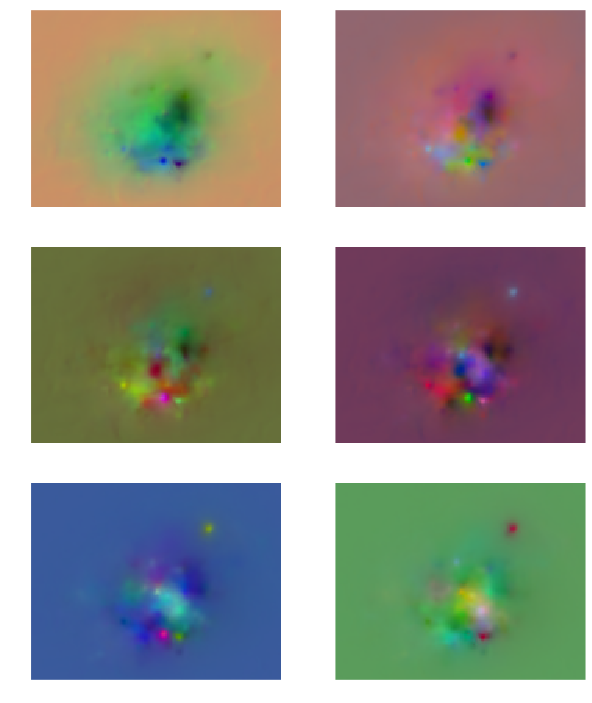

In [29]:
from numpy import amax
# sns.set_context('notebook')

Sc = 0.8
maps = Colorize(cmap='rgb', scale=Sc).transform(imgsA)
ax1 = plt.subplot(321)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsB)
ax1 = plt.subplot(322)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsC)
ax1 = plt.subplot(323)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsD)
ax1 = plt.subplot(324)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsE)
ax1 = plt.subplot(325)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsF)
ax1 = plt.subplot(326)
image(maps,2)

It mat be better to look at the data without normalizing it first. Here is how we can do this:

In [30]:
# So maybe it is better to normalize the data:
ts2 = data.toTimeSeries().normalize()

In [31]:
# Run PCA with three components

from thunder import PCA
model2 = PCA(k=10).fit(ts2)

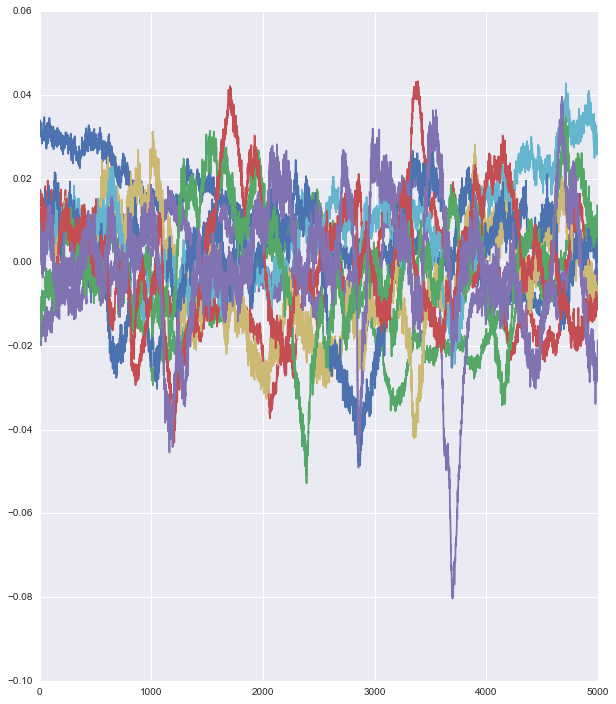

In [32]:
plt.plot(model2.comps.T);

In [33]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one, just like we did before...

imgs2 = model2.scores.pack()
imgs2.shape

(10, 126, 160)

In [34]:
# Lets seperate into the first an last three basis functions:
imgsA = imgs2[0:3,:,:] # first 3
imgsB = imgs2[1:4,:,:]  # Last 3
imgsC = imgs2[2:5,:,:] # first 3
imgsD = imgs2[3:6,:,:]  # Last 3
imgsE = imgs2[4:7,:,:] # first 3
imgsF = imgs2[5:8,:,:]  # Last 3

imgsB.shape

(3, 126, 160)

Resize images to fit screen....

In [35]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

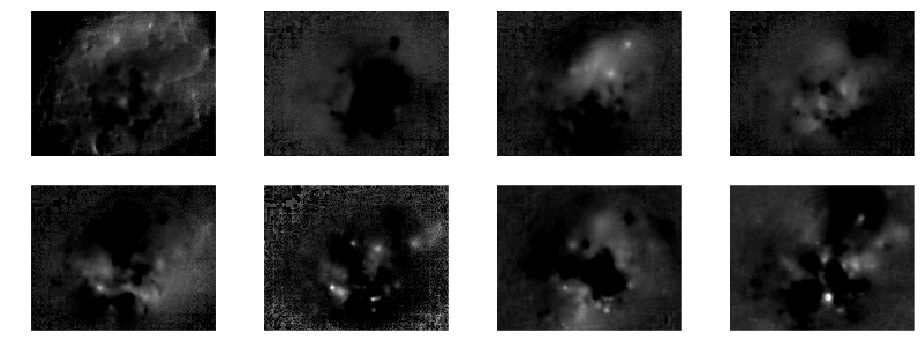

In [36]:
CX = (-0.005,0.05)

ax1 = plt.subplot(441)
image(imgs2[0,:,:], clim=CX)
ax1 = plt.subplot(442)
image(imgs2[1,:,:], clim=CX)
ax1 = plt.subplot(443)
image(imgs2[2,:,:], clim=CX)
ax1 = plt.subplot(444)
image(imgs2[3,:,:], clim=CX)


ax1 = plt.subplot(445)
image(imgs2[4,:,:], clim=CX)
ax1 = plt.subplot(446)
image(imgs2[5,:,:], clim=CX)
ax1 = plt.subplot(447)
image(imgs2[6,:,:], clim=CX)
ax1 = plt.subplot(448)
image(imgs2[7,:,:], clim=CX)

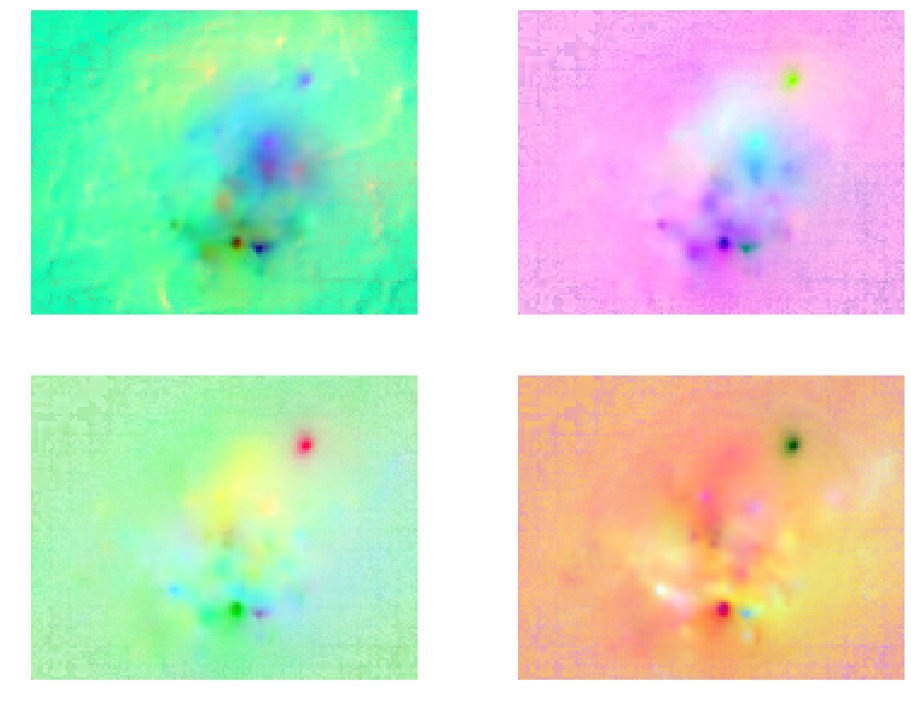

In [41]:
from numpy import amax
# sns.set_context('notebook')

Sc = 1.1
maps = Colorize(cmap='rgb', scale=Sc).transform(imgsA)
ax1 = plt.subplot(221)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsB)
ax1 = plt.subplot(222)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsC)
ax1 = plt.subplot(223)
image(maps,2)

maps = Colorize(cmap='rgb', scale=Sc).transform(imgsD)
ax1 = plt.subplot(224)
image(maps,2)


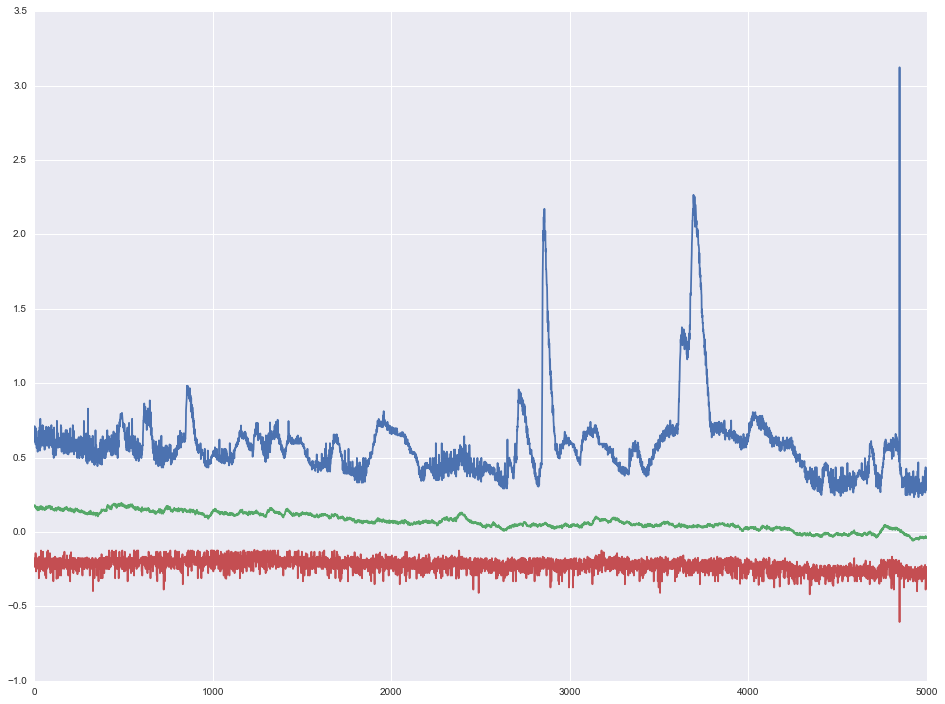

In [42]:
## Take a subset of pixels, and plot them 
plt.plot(ts.normalize().max());
plt.plot(ts.normalize().mean());
plt.plot(ts.normalize().min());

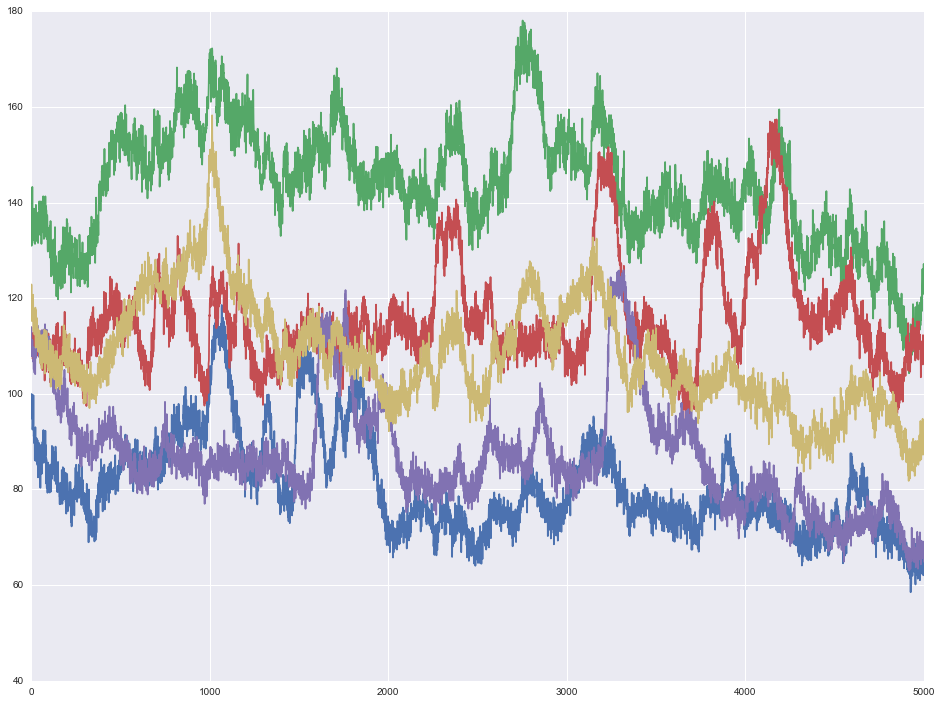

In [71]:
## Take a subset of pixels, and plot them 
# ts is the timsereis, we defiend earlier

examples = data.toTimeSeries().center(axis=1).subset(nsamples=5, thresh=10)

plt.plot(examples.T); #  [0:20,:]);

In [75]:
examples.shape


(5, 5001)

In [77]:
import numpy as np
mean = examples.mean(axis=1)

In [79]:
examples2 = examples - mean[:, np.newaxis]

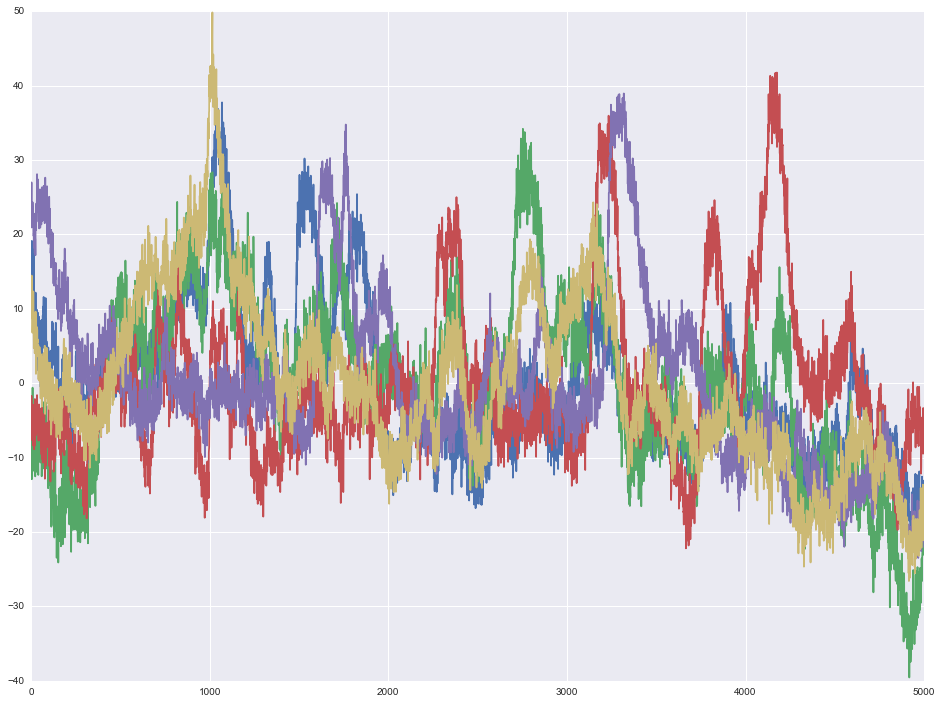

In [81]:
plt.plot(examples2.T); #  [0:20,:]);

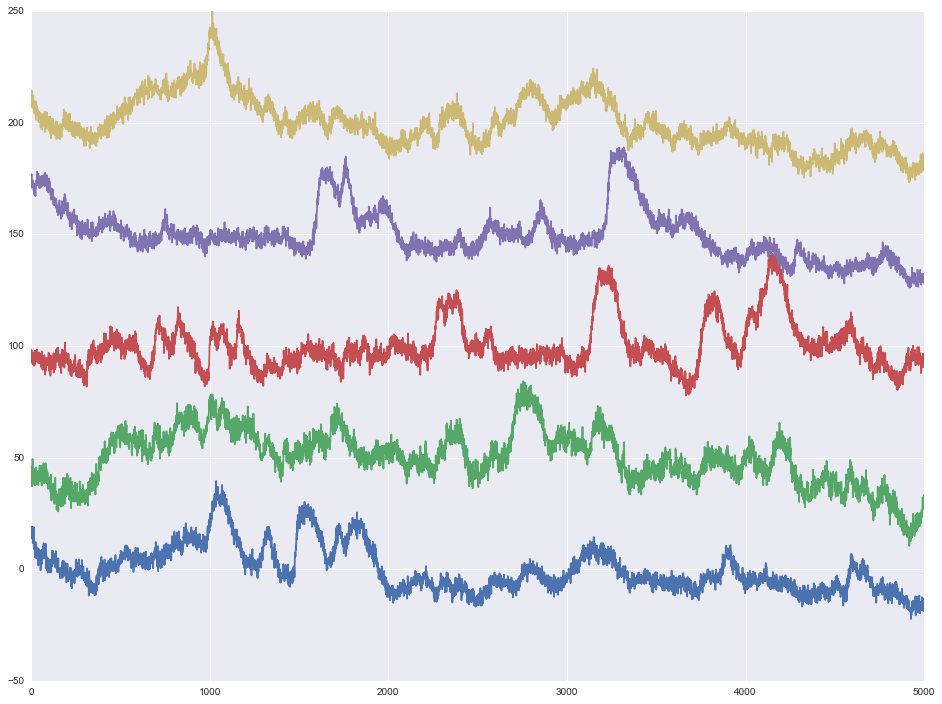

In [86]:
examples3 = (examples2.T + np.arange(0,5)*50).T
plt.plot(examples3.T); #  [0:20,:]);

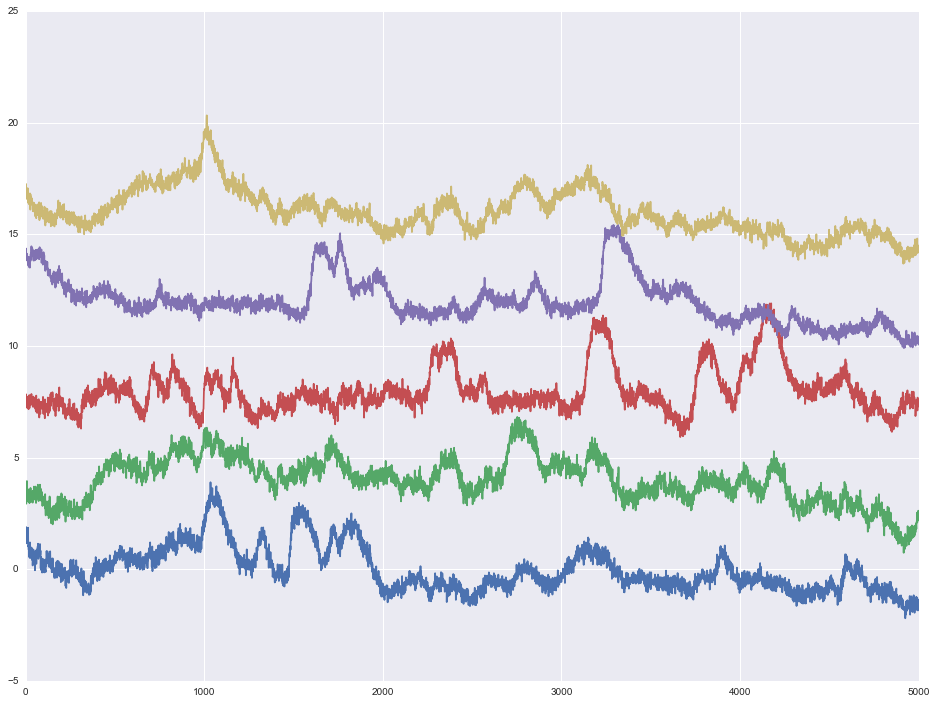

In [90]:
# Plot these same traces, only taking the zscore so 
# that they are in terms of standard deviation...

from scipy import stats
examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,5)*4).T
plt.plot(examples5.T); #  [0:20,:]);

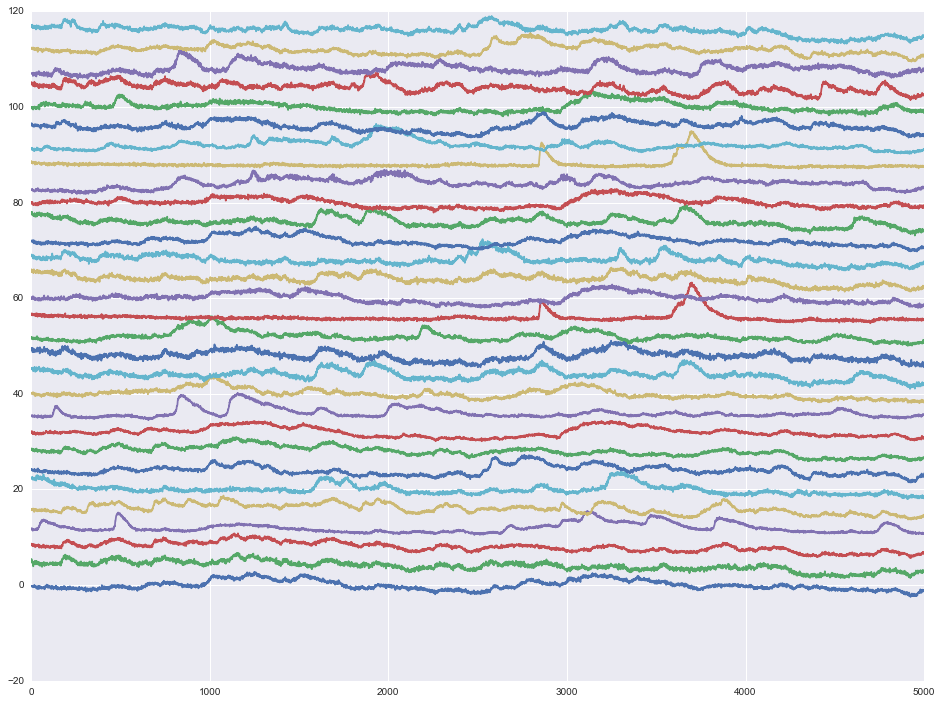

In [97]:
# Plot 30 Traces...

import numpy as np
from scipy import stats
lines = 30

examples = data.toTimeSeries().center(axis=1).subset(nsamples=lines, thresh=10)
mean = examples.mean(axis=1)

examples2 = examples - mean[:, np.newaxis]

examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,lines)*4).T
plt.plot(examples5.T); #  [0:20,:]);



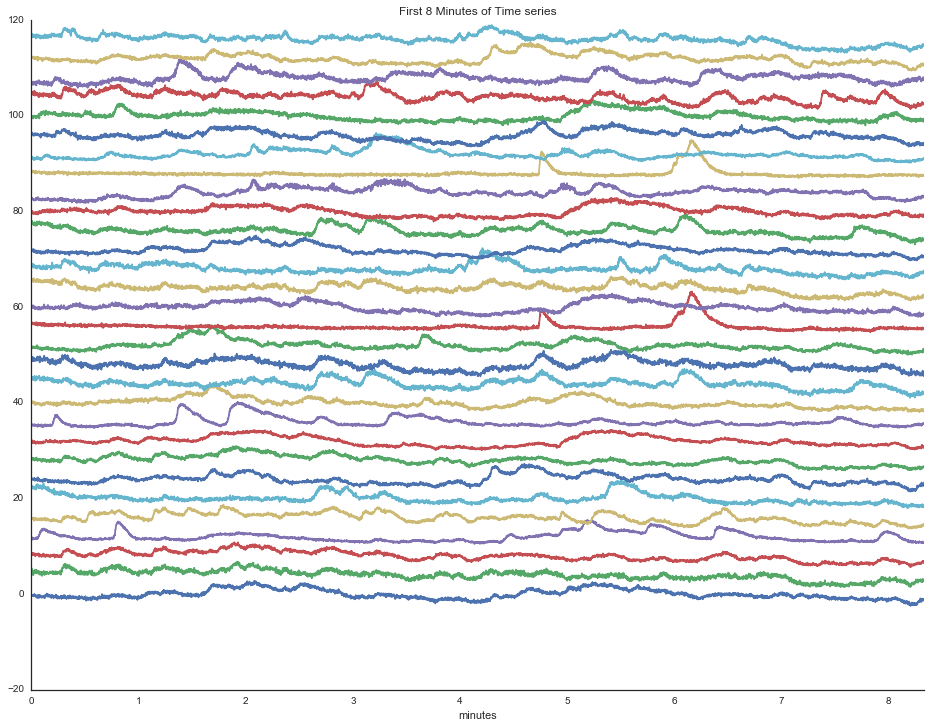

In [163]:
import seaborn as sns
sns.set_style("white")
plt.title('First 8 Minutes of Time series')

plt.plot(examples5.T); #  [0:20,:]);
ticks = np.arange(1,examples5.shape[1],600) # Make tics every 600 steps, or once per minute
labels = range(ticks.size)
plt.xticks(ticks, labels)
plt.xlabel('minutes')
sns.despine()